In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,6]

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,Order Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000
1,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940000
2,12/06/2017,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000
3,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,201.864499
4,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000


In [3]:
df.shape

(9800, 12)

##### 1. Tổng doanh thu và sự tăng trưởng doanh thu qua các năm.

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
df['Year'] = df['Order Date'].dt.year 
df['Month'] = df['Order Date'].dt.month 

In [5]:
cols = df.columns.tolist()
cols

['Order Date',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Year',
 'Month']

In [6]:
df = df[['Order Date','Year','Month','Segment','Country','City','State','Region','Category','Sub-Category','Sales']]
df.head()

,Order Date,Year,Month,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,2017-11-08,2017,11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960000
1,2017-11-08,2017,11,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.940000
2,2017-06-12,2017,6,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620000
3,2016-10-11,2016,10,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,201.864499
4,2016-10-11,2016,10,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368000


In [7]:
# Lọc ra tổng sales qua các năm bằng lệnh groupby
total_sales = df.groupby('Year').agg(Total_sales = ('Sales','sum')).reset_index()
total_sales

,Year,Total_sales
0,2015,423255.763447
1,2016,413425.363450
2,2017,519094.119932
3,2018,622496.839919


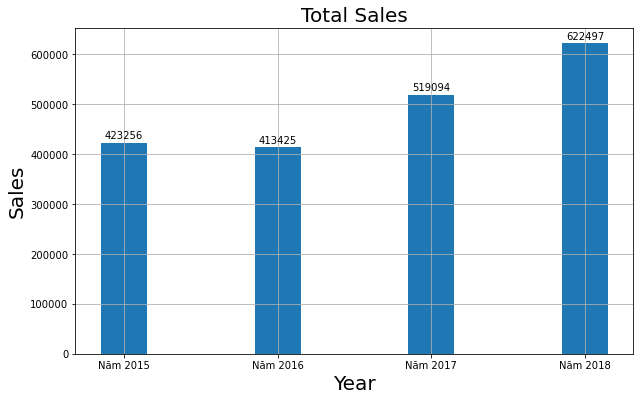

In [8]:
bar = plt.bar(total_sales['Year'], total_sales['Total_sales'], width=0.3, \
    tick_label = ['Năm 2015', 'Năm 2016', 'Năm 2017', 'Năm 2018'])
plt.title('Total Sales', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.bar_label(bar, padding=2, size=10)
plt.grid('seaborn') 

In [9]:
# tính phần trăn thay đổi theo công thức ((2016-2015)/2015) * 100 bằng .pct_change
revenue = total_sales['Total_sales'].pct_change()*100
revenue


0          NaN
1    -2.322567
2    25.559331
3    19.919840
Name: Total_sales, dtype: float64

In [10]:
# Vậy từ bộ dữ liệu ta có thể thấy rằng năm 2015 đến năm 2016 có sự tăng trưởng âm, cụ thể là -2.32%
# Vậy từ bộ dữ liệu ta có thể thấy rằng năm 2016 đến năm 2017 có sự tăng trưởng dương, cụ thể là 25.55%
# Vậy từ bộ dữ liệu ta có thể thấy rằng năm 2017 đến năm 2018 có sự tăng trưởng dương, cụ thể là 19.92%

In [11]:
### Nguyên nhân tại sao doanh thu của 2016 lại âm??? ( câu hỏi phát sinh)

##### 2. Chia bộ dữ liệu ra làm 2:
##### + Bộ thứ nhất: Các vùng có lượng sales vượt trội hơn so với vùng còn lại.
##### + Bộ thứ hai: Các vùng còn lại

In [12]:
# Sau khi nhận được câu hỏi, nhóm có thể xác định được các vùng có sales vượt trội hơn so với các vùng còn lại là các giá trị 
# outlier của cột sales. Vì vậy, đầu tiên phải xác định được các giá trị oulier trong bộ dữ liệu.

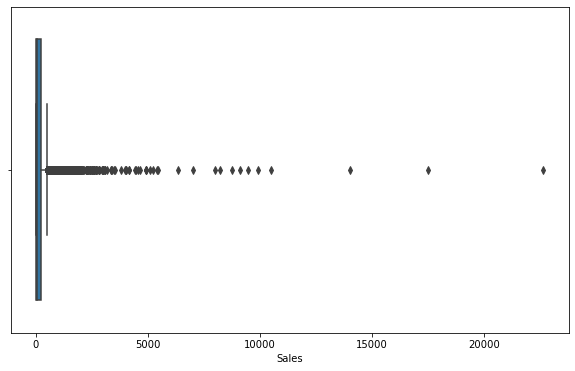

In [13]:
sns.boxplot(x=df['Sales']);

In [14]:
# Dựa trên biểu đồ trên có thể thấy có các vùng đang rất phát triển, sales vượt trội hơn so với các vùng khác, có một nhóm vùng có mức sales nằm
# vượt hơn so với nhóm còn lại, cụ thể là trong khoảng từ 70000 đến 10000

In [15]:
# Phương pháp lấy ra các outlier của nhóm sẽ là IQR.
# Outlier sẽ là những điểm mà nằm dưới Q1 ít nhất là 1.5*IQR, hoặc nằm trên Q3 ít nhất là 1.5*IQR.
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
IQR

184.53199864780046

In [16]:
Test_1 = ~((df['Sales'] > (Q3 + 1.5 * IQR)))
Subequal = df[Test_1]
Test_2 = ~((df['Sales'] < (Q3 + 1.5 * IQR)))
Outstanding = df[Test_2]
# df['Sales'] < (Q1 - 1.5 * IQR)) | 


In [17]:
print(f'Dữ liệu còn lại sau khi lấy outlier là {(Subequal.shape[0] / df.shape[0]) * 100} %')
print(Subequal.shape)
Subequal.head()
# Nhận xét: IQR đã tách bộ dữ liệu thành 2 tập DataFrame bao gồm:
# + Outstanding: Các vùng có lượng sales vượt trội, chiếm 10.82% tổng dữ liệu.
# + Subequal: Các vùng có lượng sales không quá vượt trội nhau chiếm 89.18% tổng dữ liệu.


Dữ liệu còn lại sau khi lấy outlier là 89.18367346938776 %
(8740, 11)


,Order Date,Year,Month,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,2017-11-08,2017,11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960000
2,2017-06-12,2017,6,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620000
3,2016-10-11,2016,10,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,201.864499
4,2016-10-11,2016,10,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368000
5,2015-06-09,2015,6,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.860000


In [18]:
print(Outstanding.shape)
Outstanding.head()

(1060, 11)


,Order Date,Year,Month,Segment,Country,City,State,Region,Category,Sub-Category,Sales
1,2017-11-08,2017,11,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.940
7,2015-06-09,2015,6,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.152
11,2015-06-09,2015,6,Consumer,United States,Los Angeles,California,West,Technology,Phones,911.424
16,2015-11-11,2015,11,Consumer,United States,Madison,Wisconsin,Central,Office Supplies,Storage,665.880
24,2016-09-25,2016,9,Consumer,United States,Orem,Utah,West,Furniture,Tables,1044.630


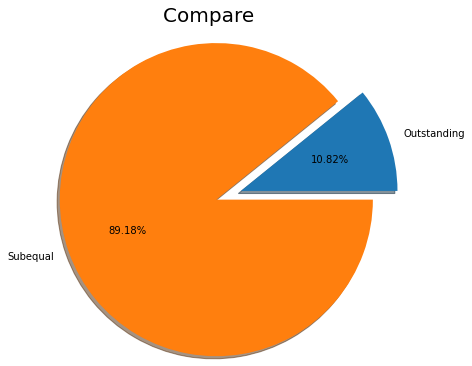

In [19]:
x = [10.82, 89.18]
labels = ['Outstanding','Subequal']
explode = [0, 0.2]
plt.pie(x, labels=labels,shadow=True, autopct='%1.2f%%', explode=explode, radius=1.2);
plt.title('Compare          ', fontsize = 20);

In [20]:
# Subequal.to_csv('Subequal.CSV')
# Outstanding.to_csv('Outstanding.csv')

##### Yêu cầu 3: Với đối tượng khách hàng là Consumer, hãy cho biết khu vực đạt doanh thu cao nhất trong từng năm?

In [21]:
# Tính tổng sales theo 3 cột 'Year', 'Sub-Category', 'Segment'.
sales1 = df.groupby(['Year', 'Sub-Category', 'Segment'])['Sales'].sum().reset_index()
sales1 

,Year,Sub-Category,Segment,Sales
0,2015,Accessories,Consumer,12602.154499
1,2015,Accessories,Corporate,4868.056000
2,2015,Accessories,Home Office,5474.114000
3,2015,Appliances,Consumer,6518.662000
4,2015,Appliances,Corporate,5598.986000
...,...,...,...,...
199,2018,Supplies,Corporate,6801.904000
200,2018,Supplies,Home Office,358.690000
201,2018,Tables,Consumer,24017.287496
202,2018,Tables,Corporate,11686.543496


In [22]:
# # Tính tổng sale với đối tượng khách hàng là Consumer qua từng năm.
# Segment_Consumer2015 = sales1[(sales1['Year'] ==2015) & (sales1['Segment'] =='Consumer')].sort_values(by = ['Sales'], ascending = False).nlargest(5, columns = ['Sales'])
# Segment_Consumer2016 = sales1[(sales1['Year'] ==2016) & (sales1['Segment'] =='Consumer')].sort_values(by = ['Sales'], ascending = False).nlargest(5, columns = ['Sales'])
# Segment_Consumer2017 = sales1[(sales1['Year'] ==2017) & (sales1['Segment'] =='Consumer')].sort_values(by = ['Sales'], ascending = False).nlargest(5, columns = ['Sales'])
# Segment_Consumer2018 = sales1[(sales1['Year'] ==2018) & (sales1['Segment'] =='Consumer')].sort_values(by = ['Sales'], ascending = False).nlargest(5, columns = ['Sales']) 

In [23]:
# Tính tổng sales theo 3 cột 'Year', 'Region', 'Segment'.
Region = df.groupby(['Year', 'Region', 'Segment'])['Sales'].sum().reset_index() 

In [24]:
# Dựa trên tổng sale tìm loại sản phẩm và khu vực có doanh thu 
# cao nhất qua từng năm với đối tượng khách hàng là Consumer. 
sales2015 = Region[(Region['Year'] ==2015) & (sales1['Segment'] =='Consumer')]\
    .sort_values(by = ['Sales'], ascending = False).nlargest(5, columns = ['Sales']) 
sales2016 = Region[(Region['Year'] ==2016) & (sales1['Segment'] =='Consumer')]\
    .sort_values(by = ['Sales'], ascending = False).nlargest(5, columns = ['Sales'])
sales2017 = Region[(Region['Year'] ==2017) & (sales1['Segment'] =='Consumer')]\
    .sort_values(by = ['Sales'], ascending = False).nlargest(5, columns = ['Sales'])
sales2018 = Region[(Region['Year'] ==2018) & (sales1['Segment'] =='Consumer')]\
    .sort_values(by = ['Sales'], ascending = False).nlargest(5, columns = ['Sales']) 

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_19452/4157004743.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales2015 = Region[(Region['Year'] ==2015) & (sales1['Segment'] =='Consumer')]\
C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_19452/4157004743.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales2016 = Region[(Region['Year'] ==2016) & (sales1['Segment'] =='Consumer')]\
C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_19452/4157004743.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales2017 = Region[(Region['Year'] ==2017) & (sales1['Segment'] =='Consumer')]\
C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_19452/4157004743.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales2018 = Region[(Region['Year'] ==2018) & (sales1['Segment'] =='Consumer')]\


In [51]:
sales2018

,Year,Region,Segment,Sales
45,2018,West,Consumer,91854.403485
39,2018,East,Consumer,75553.301491
36,2018,Central,Consumer,64449.704491
42,2018,South,Consumer,53363.960496


In [25]:
# # Ghi dữ liệu lấy được từ câu trên ghi vào file
# sales2015.to_csv('Sales_Re_Con_2015.csv')
# sales2016.to_csv('Sales_Re_Con_2016.csv')
# sales2017.to_csv('Sales_Re_Con_2017.csv')
# sales2018.to_csv('Sales_Re_Con_2018.csv')

##### 4. Trong những năm 2015 - 2018, với từng bang của nước Mỹ, hãy đánh giá mức độ bán hàng của từng thành phố? 

In [26]:
df[['Sales']].describe()

,Sales
count,9800.000000
mean,201.864499
std,556.281121
min,0.990000
25%,17.332500
50%,54.816000
75%,201.864499
max,22638.480000


In [27]:
## bins ở đây có nghĩa là định nghĩa các khoảng giá trị trong 1 nhóm từ min đến 25%, 25% đến 50% .....

In [28]:
# chia khoảng theo từng bang của nước Mỹ.
# np.quantile là dùng để tính tứ phân vị trong thống kê.
values = np.array(df[['Sales']])
_min_p = np.min(values)
_25_p = np.quantile(values, 0.25)
_50_p = np.quantile(values, 0.50)
_75_p = np.quantile(values, 0.75)
_max_p = np.max(values)
bins = [_min_p, _25_p, _50_p, _75_p, _max_p ]
bins

[0.99, 17.3325, 54.816, 201.86449864780047, 22638.48]

In [29]:
df["Sales review"]  = df.groupby(by="State")[["Sales"]].transform(lambda x: pd.cut(x, bins=bins))

In [30]:
df.head()

,Order Date,Year,Month,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Sales review
0,2017-11-08,2017,11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960000,"(201.864, 22638.48]"
1,2017-11-08,2017,11,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.940000,"(201.864, 22638.48]"
2,2017-06-12,2017,6,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620000,"(0.99, 17.332]"
3,2016-10-11,2016,10,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,201.864499,"(54.816, 201.864]"
4,2016-10-11,2016,10,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368000,"(17.332, 54.816]"


In [31]:
df['Sales review'] = df['Sales review'].astype(str)
df['Sales review'] = df['Sales review']\
    .replace({'(0.99, 17.332]':'Thấp','(17.332, 54.816]':'Trung Bình','(54.816, 201.864]':'Cao', '(201.864, 22638.48]':'Siêu Cao'})

In [32]:
# df[['Sales review']].value_counts().unique

In [33]:
df.head()

,Order Date,Year,Month,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Sales review
0,2017-11-08,2017,11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960000,Siêu Cao
1,2017-11-08,2017,11,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.940000,Siêu Cao
2,2017-06-12,2017,6,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620000,Thấp
3,2016-10-11,2016,10,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,201.864499,Cao
4,2016-10-11,2016,10,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368000,Trung Bình


In [34]:
df['Year'].value_counts()

2018    3258
2017    2534
2016    2055
2015    1953
Name: Year, dtype: int64

In [35]:
df_all_4 = df.groupby(['Year','Sales review']).agg( Review_counts = ( 'Sales review','count' )).reset_index()
df_all_4.drop(index=[16], inplace=True)

In [36]:
df_2015 = df_all_4.query("Year == 2015")
df_2016 = df_all_4.query("Year == 2016")
df_2017 = df_all_4.query("Year == 2017")
df_2018 = df_all_4.query("Year == 2018")

In [37]:
df_2015

,Year,Sales review,Review_counts
0,2015,Cao,478
1,2015,Siêu Cao,484
2,2015,Thấp,507
3,2015,Trung Bình,484


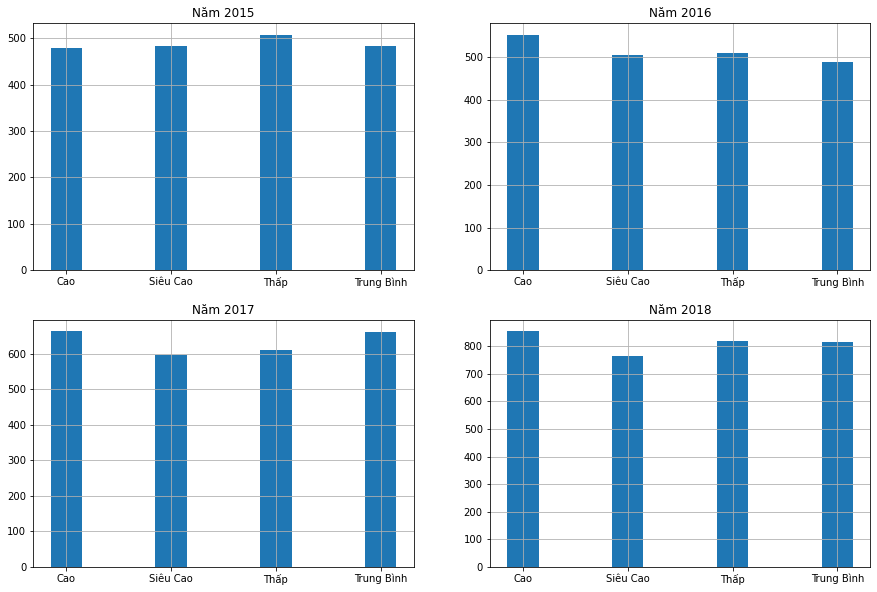

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))
ax1.bar(df_2015['Sales review'], df_2015['Review_counts'], width=0.3);
ax1.set_title('Năm 2015')
ax1.grid('searborn')

ax2.bar(df_2016['Sales review'], df_2016['Review_counts'], width=0.3);
ax2.set_title('Năm 2016')
ax2.grid('searborn')

ax3.bar(df_2017['Sales review'], df_2017['Review_counts'], width=0.3);
ax3.set_title('Năm 2017')
ax3.grid('searborn')

ax4.bar(df_2018['Sales review'], df_2018['Review_counts'], width=0.3);
ax4.set_title('Năm 2018')
ax4.grid('searborn')
# bar = plt.bar(total_sales['Year'], total_sales['Total_sales'], width=0.3, \
# tick_label = ['Năm 2015', 'Năm 2016', 'Năm 2017', 'Năm 2018'])
# plt.title('Total Sales', fontsize = 20)
# plt.xlabel('Year', fontsize = 20)
# plt.ylabel('Sales', fontsize = 20)
# plt.bar_label(bar, padding=2, size=10)
# plt.grid('seaborn')

##### So sánh đánh giá sales mỗi năm theo đối tượng khách hàng

In [39]:
segment = df.groupby(['Year','Segment','Sales review']).agg(Review_counts = ( 'Sales review','count' )).reset_index()
segment['Segment'].value_counts()
segment.drop(index=[48], inplace=True)
segment

,Year,Segment,Sales review,Review_counts
0,2015,Consumer,Cao,249
1,2015,Consumer,Siêu Cao,256
2,2015,Consumer,Thấp,267
3,2015,Consumer,Trung Bình,273
4,2015,Corporate,Cao,156
5,2015,Corporate,Siêu Cao,146
6,2015,Corporate,Thấp,162
7,2015,Corporate,Trung Bình,137
8,2015,Home Office,Cao,73
9,2015,Home Office,Siêu Cao,82


In [40]:
Segment_Consumer = segment.query("Segment == 'Consumer'")
segment_Home_Office = segment.query("Segment == 'Home Office'")
segment_Corporate = segment.query("Segment == 'Corporate'")
# Segment_Consumer.to_csv('Segment_Consumer.csv')
# segment_Home_Office.to_csv('segment_Home_Office.csv')
# segment_Corporate.to_csv('segment_Corporate.csv')


##### So sánh đánh giá sales mỗi năm theo khu vực nước Mỹ.

In [41]:
region = df.groupby(['Year','Region','Sales review']).agg(Review_counts = ( 'Sales review','count' )).reset_index()
region.drop(index=[64], inplace=True)

In [42]:
region['Region'].value_counts()

Central    16
East       16
South      16
West       16
Name: Region, dtype: int64

In [43]:
region_central = region.query("Region == 'Central'")
region_East = region.query("Region == 'East'")
region_South = region.query("Region == 'South'")
region_West = region.query("Region == 'West'")

# region_central.to_csv('region_central.csv')
# region_East.to_csv('region_East.csv')
# region_South.to_csv('region_South.csv')
# region_West.to_csv('region_West.csv')

##### So sánh đánh giá sales mỗi năm theo loại sản phẩm.

In [44]:
category = df.groupby(['Year','Category','Sales review']).agg(Review_counts = ( 'Sales review','count' )).reset_index()
category.drop(index=[48], inplace=True)

In [45]:
category['Category'].value_counts()

Furniture          16
Office Supplies    16
Technology         16
Name: Category, dtype: int64

In [46]:
category_Furniture = category.query("Category == 'Furniture'")
category_Office_Supplies = category.query("Category == 'Office Supplies'")
category_Technology = category.query("Category == 'Technology'")

In [47]:
# category_Furniture.to_csv('category_Furniture.csv')
# category_Office_Supplies.to_csv('category_Office_Supplies.csv')
# category_Technology.to_csv('category_Technology.csv')

In [48]:
# Yêu cầu 5: Tôi muốn mở 1 cửa hàng kinh doanh về sản phẩm công nghệ thì tôi nên hướng tới đối tượng, mục tiêu/ 
# Tùy theo từng giai đoạn về biến động tình hình trong năm thì sẽ có 1 loại sản phẩm bán chạy vậy?


# (đặt câu hỏi tại sao?) vd tại sao lại phát triển sản phẩm tại vùng đó 
# ở vùng nào để có thể đạt được hiệu quả kinh doanh ?
# - Sales về công nghệ ở vùng nào nhiều nhất, hướng đối tượng.
# + Dùng công cụ là python, lấy ra dữ liệu về công nghệ, sau đó tính tổng sales theo từng vùng => sales vùng nào ổn nhất.
# + Vẽ biểu đồ để so sánh lượng sales về sản phẩm đó qua các năm ( python or BI) 
# - Nếu như tìm được thêm 1 bộ dữ liệu nào về số lượng công nhân hay là đối tượng hay sản phẩm này thì càng tốt ( nếu ) 
# - Google:  Tìm hiểu hiểu xem ở vùng đó tại sao lại phát triển sản phẩm công nghệ đó, nếu như phát triển ở đó thì cơ hội và thách thức (  ) là gì? 
# cung cầu, bị thuộc vào vùng địa lý, LA là SPM sau NY. tìm hiểu tại sao văn phòng phẩm tại LA lại đánh giá thấp. 
# phân tích tổng quát thêm các biến khác, xem đối tượng khách hàng ( Segment ).
# Khi người ta bán được nhiều hàng, xem thời điểm bán hàng cao dựa vào ( Year, Month ).
# note: tìm hiểu về dân số tại các vùng, GDP của các tiểu bang, đối tượng khách hàng công việc/ tra xem  phần trăm tại tại vùng đó.
# Văn phòng phẩm, đồ công nghệ phục vụ học tập tiêu thụ nhiều nhất là tháng 7 tháng 8 ( tựu trường ), có các khuyến mại
# tổng quát: các biến cầng: Dân số, GDP đầu người, vùng sales cao về sản phẩm công nghệ, 


In [49]:
# Yêu cầu 6: Tùy theo từng giai đoạn về biến động tình hình trong năm thì sẽ có 1 loại sản phẩm bán chạy vậy
# tôi nên đẩy mạnh sản phẩm công nghệ vào thời điểm nào?
# Khi người ta bán được nhiều hàng, xem thời điểm bán hàng cao dựa vào (Year,Month ), xem các 5 force porter, swot.
# kiểm định, 